# SML Exercise - Decision Trees

In [1]:
# Imports:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# 1) Load Hyderabad.csv into a Pandas dataframe. Then
# Copy the ‘Price’ column into a NumPy array called ‘labels’.
# Copy the ‘Location’ column into a NumPy array called ‘loc’. Reshape loc so that it is 2d (with just one column).
# Copy the other columns into a NumPy array called ‘other_features’.

data = pd.read_csv('Hyderabad.csv')

labels = np.array(data['Price'])
loc = np.array(data['Location']).reshape(-1, 1)

data_other = data.drop(['Price', 'Location'], axis=1)
other_features = np.array(data_other)

In [3]:
# 2) Use the sklearn class OneHotEncoder() to one-hot encode loc.
# Fit the encoder to loc.
# Transform loc and store the encoded data in a NumPy array called ‘enc_loc’.

enc = OneHotEncoder()

enc.fit(loc)
enc_loc = enc.transform(loc).toarray()

In [4]:
# 3) Concatenate enc_loc with other_features.
# Use the NumPy function concatenate() with the option ‘axis=1’ to join enc_loc and other_features into a single NumPy array called ‘features’.
# Print the shapes of enc_loc, other_features, and features to check that the join was done correctly. (Each should have the same number of rows.)

features = np.concatenate((enc_loc, other_features), axis=1)
print('enc_loc:', enc_loc.shape)
print('other_features:', other_features.shape)
print('features:', features.shape)

enc_loc: (2518, 243)
other_features: (2518, 38)
features: (2518, 281)


Maximum Error: 7200000.0
Root Mean Square Error: 328191.89692443755


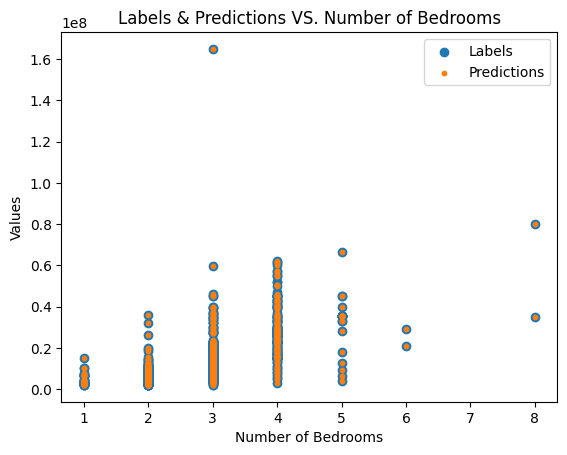

In [5]:
# 4) Train and evaluate a decision tree model.
# Instantiate an sklearn DecisionTreeRegressor model.
# Train the model on features to predict labels using the default options.
# Use the model to make predictions on features and store these in a NumPy array called ‘preds’.
# Use sklearn to calculate and display the maximum error and root mean squared error.
# Use matplotlib to make a scatter plot of labels vs. No. of Bedrooms. On the same plot, but using smaller markers, 
# add a scatter plot of preds vs. No. of Bedrooms. Add a legend, and discuss in markdown how well the predictions match the labels.

model = DecisionTreeRegressor()
model.fit(features, labels)
preds = np.array(model.predict(features))

max_err = max_error(labels, preds)
rmse = np.sqrt(mean_squared_error(labels, preds))
print('Maximum Error:', max_err)
print('Root Mean Square Error:', rmse)

# Scatter Plot:
plt.scatter(data['No. of Bedrooms'], labels, label='Labels')
plt.scatter(data['No. of Bedrooms'], preds, label='Predictions', s=10)
plt.title('Labels & Predictions VS. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Values')
plt.legend()
plt.show()

**Explanation:**

The predictions match the labels perfectly. Each prediction marker aligns with each label marker perfectly, to the point where outliers are also aligned very well (such as the markers for 3 bedrooms and above 1.6, and 8 bedrooms and 0.4 and 0.8 values).

The model demonstrates strong alignment between predictions and labels, as shown by the visual representation and relatively low RMSE. However, the sizeable maximum error indicates deviations from the true and predicted values. 

In [6]:
# Here is the markdown again:

# Explanation:

# The predictions match the labels perfectly. Each prediction marker aligns with each label marker perfectly, 
# to the point where outliers are also aligned very well (such as the markers for 3 bedrooms and above 1.6, and 8 bedrooms and 0.4 and 0.8 values).

# The model demonstrates strong alignment between predictions and labels, as shown by the visual representation and relatively low RMSE. 
# However, the sizeable maximum error indicates deviations from the true and predicted values. 

In [7]:
# 5) The performance of the linear regression model in Chapter 3 was:
# · max_error=140528362.75773957
# · rmse=4217995.610498081
# Add a markdown cell to compare the performance of the decision tree with the linear regression model. 
# We did not use a train/validate/test split on the data in this exercise – how well do you think the 
# decision tree would do in predicting the value of new houses? Would you find that the decision tree overfits or underfits?

**Explanation:**

**Decision Tree Performance:**
<pre>
Maximum Error: 7200000.0
Root Mean Square Error: 328191.89692443755
</pre>
**Linear Regression Model Performance:**
<pre>
Maximum Error: 140528362.75773957
Root Mean Square Error: 4217995.610498081
</pre>
**Evaluation:**

The performance of the decision tree model compared to the linear regression model is significantly different. The most striking difference is the major change in errors. While the decision tree shows much smaller errors, with a maximum error in the range of millions and an RMSE in the hundred-thousands, the linear regression model has far higher errors, with maximum error in the hundred-millions and RMSE in the millions. This indicates the extreme difference in performance in each model, as a high error rate indicates low performance in a model.

Given that we did not use a train/validate/test split, it is easy to assume that it would be unclear how the model would perform with new data. With this given data, though, it looks like the decision tree might be overfitting. I believe that it is overfitting because it seems that the decision tree is perfectly fitting the training data, which would lead to poor generalization with new data.

In [8]:
# Here is the markdown again if the code is not visible:

# Decision Tree Performance:

# Maximum Error: 7200000.0
# Root Mean Square Error: 328191.89692443755
# Linear Regression Model Performance:

# Maximum Error: 140528362.75773957
# Root Mean Square Error: 4217995.610498081
# Evaluation:

# The performance of the decision tree model compared to the linear regression model is significantly different. The most striking difference is the major change in errors. 
# While the decision tree shows much smaller errors, with a maximum error in the range of millions and an RMSE in the hundred-thousands, the linear regression model has far higher errors, 
# with maximum error in the hundred-millions and RMSE in the millions. This indicates the extreme difference in performance in each model, as a high error rate indicates low performance in a model.

# Given that we did not use a train/validate/test split, it is easy to assume that it would be unclear how the model would perform with new data. 
# With this given data, though, it looks like the decision tree might be overfitting. I believe that it is overfitting because it seems that the decision tree 
# is perfectly fitting the training data, which would lead to poor generalization with new data.